<a href="https://colab.research.google.com/github/SriVarshaCheruku/brain_tumor_detection/blob/main/brain_tumor_detection_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 704ms/step - accuracy: 0.5632 - loss: 0.6981 - val_accuracy: 0.6098 - val_loss: 0.5910
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7024 - loss: 0.5582 - val_accuracy: 0.8049 - val_loss: 0.6024
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7363 - loss: 0.5457 - val_accuracy: 0.8293 - val_loss: 0.5288
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7909 - loss: 0.4830 - val_accuracy: 0.7805 - val_loss: 0.5839
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8017 - loss: 0.5322 - val_accuracy: 0.7317 - val_loss: 0.6092
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7907 - loss: 0.5178 - val_accuracy: 0.8049 - val_loss: 0.6055
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7491 - loss: 0.5263 - val_accuracy: 0.7805 - val_loss: 0.5765
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8218 - loss: 0.4030 - val_accuracy: 0.7805 - val_loss: 0.5322

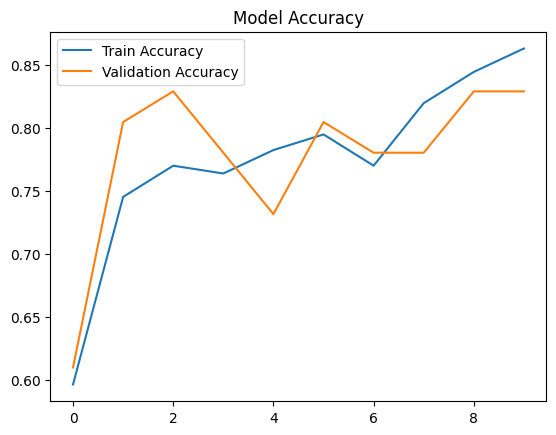

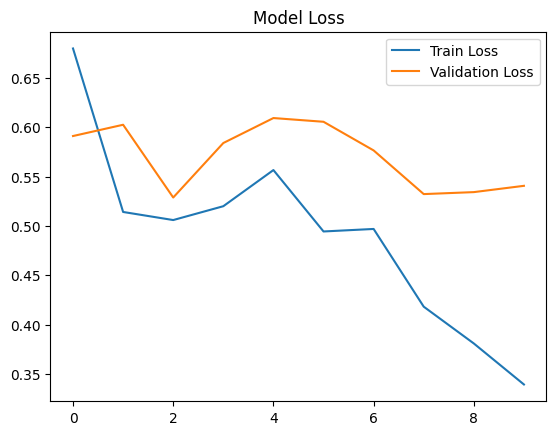

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

DATADIR = '/content/Brain-Tumor-Data'
CATEGORIES = ['yes', 'no']

data = []

IMG_SIZE = 150

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)

    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([new_array, class_num])
        except Exception as e:
            pass
import random
random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X) / 255.0  # Normalize
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.savefig('accuracy_plot.png')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.savefig('loss_plot.png')
plt.show()
